In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [3]:
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)).replace('\\', '/')
project_path

'C:/Users'

In [4]:
data_hc = pd.read_csv(r'C:\Users\R0088258\OneDrive - Allianz\Data Certificate Program\Supply Chain Project\Files\amazon_reviews_us_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_dc = pd.read_csv(r'C:\Users\R0088258\OneDrive - Allianz\Data Certificate Program\Supply Chain Project\Files\amazon_reviews_us_Digital_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_raw = pd.concat([data_hc,data_dc], axis = 0)

b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


In [5]:
data_raw.shape

(1924992, 15)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924992 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 235.0+ MB


In [7]:
data_raw.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [8]:
# check null data
print(data_raw.isnull().sum(axis = 0))

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      30
review_body          61
review_date          30
dtype: int64


In [9]:
# drop missing data, since the amount of missing data is very low
data = data_raw.dropna(axis = 0)

In [10]:
# check duplicates
print(data["marketplace"].value_counts()) #Only data from us marketplace, so we can drop the row
print("number of duplicated customer ids = ", len(data[data['customer_id'].duplicated() == True])) #most likely because customers ordered multiple items
print("number of duplicated review ids = ", len(data[data['review_id'].duplicated() == True])) 
#has to be 0 in order to ensure the ID is unique, i think we can drop this row as well in this case
#placeholder for code that shows if product_id, product_title and product_parent are fully correlated
print("product_category: ", data["product_category"].value_counts())
print("star rating: ", data["star_rating"].value_counts())
print("vines: ",data["vine"].value_counts())
print("verified_purchases: ",data["verified_purchase"].value_counts())

US    1924871
Name: marketplace, dtype: int64
number of duplicated customer ids =  798982
number of duplicated review ids =  0
product_category:  Video Games            1780154
Digital_Video_Games     144717
Name: product_category, dtype: int64
star rating:  5    1103331
4     337771
1     216459
3     165032
2     102278
Name: star_rating, dtype: int64
vines:  N    1920587
Y       4284
Name: vine, dtype: int64
verified_purchases:  Y    1288358
N     636513
Name: verified_purchase, dtype: int64


In [11]:
# check corr
round(data.corr(),2)

,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.00,0.01,-0.05,0.05,0.05
product_parent,0.01,1.00,0.01,-0.00,-0.00
star_rating,-0.05,0.01,1.00,-0.05,-0.11
helpful_votes,0.05,-0.00,-0.05,1.00,0.95
total_votes,0.05,-0.00,-0.11,0.95,1.00


In [12]:
# drop the rows we do not need for this analysis or our model
to_drop = ["marketplace"] # "review_id", "product_id", "product_parent"
data = data.drop(to_drop, axis=1)

In [13]:
#converting to lower case
data['review_body'] = data['review_body'].astype(str).str.lower()
data['review_headline'] = data['review_headline'].astype(str).str.lower()
data.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31


In [16]:
#removing punctuation and converting to lower case
import re
import string

def text_clean1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text

cleaned1 = lambda x: text_clean1(x)

#sample data to test code
data_subsample = data.iloc[0:100]

# using function on columns
data_subsample['cleaned_reviewheadline'] = data_subsample['review_headline'].apply(cleaned1)
data_subsample['cleaned_reviewbody'] = data_subsample['review_body'].apply(cleaned1)


#Another round of cleaning
def text_clean2(text):
    text = re.sub('\n','', text)
    return text

cleaned2 = lambda x: text_clean2(x)
data_subsample['cleaned_reviewheadline'] = data_subsample['cleaned_reviewheadline'].apply(cleaned2)
data_subsample['cleaned_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(cleaned2)

data_subsample.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used this for elite dangerous on my mac an ama...
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved it i didnt even realise it was a gaming...
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work and not as it is advertised
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice but tend to slip away from stick in inten...
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great for collecting quality mate...


In [17]:
#Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
data_subsample['cleaned_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(lambda words: ' '.join(word.lower() for word in words.split()if word not in stopwords))
data_subsample.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used elite dangerous mac amazing joystick espe...
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved didnt even realise gaming mouse typed 34...
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work advertised
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice tend slip away stick intense hard pressed...
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great collecting quality material...


In [34]:
#Tokenization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

data_subsample['tokenized_reviewbody'] = data_subsample['cleaned_reviewbody'].apply(lemmatize_text)
data_subsample.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\R0088258/nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\R0088258\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\R0088258\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [33]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
data_subsample['tokenizedbody'] = data_subsample['cleaned_reviewbody'].apply(tokenizer.tokenize)
data_subsample.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody,word length,star_sentiment,tokenizedbody
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used elite dangerous mac amazing joystick espe...,17,Positive,"[w, w, w]"
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved didnt even realise gaming mouse typed 34...,25,Positive,"[w, w]"
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work advertised,4,Negative,[w]
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice tend slip away stick intense hard pressed...,10,Inbetween,[w]
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great collecting quality material...,9,Inbetween,[]


In [37]:
#Text Exploratory Analysis
data_subsample['word_length'] = data_subsample['cleaned_reviewbody'].str.split().str.len()
data_subsample.head()
def sentiment(row):
    if row['star_rating'] == 5:
        return "Positive"
    elif row['star_rating'] == 1:
        return "Negative"
    elif  1 < row['star_rating'] < 5:
        return "Inbetween"
    else:
        return "Undefined"
    

data_subsample['star_sentiment'] = data_subsample.apply(sentiment,axis =1)
data_subsample.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody,word length,star_sentiment,tokenizedbody,word_length
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used elite dangerous mac amazing joystick espe...,17,Positive,"[w, w, w]",17
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved didnt even realise gaming mouse typed 34...,25,Positive,"[w, w]",25
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work advertised,4,Negative,[w],4
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice tend slip away stick intense hard pressed...,10,Inbetween,[w],10
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great collecting quality material...,9,Inbetween,[],9


array([[<AxesSubplot:title={'center':'word_length'}>]], dtype=object)

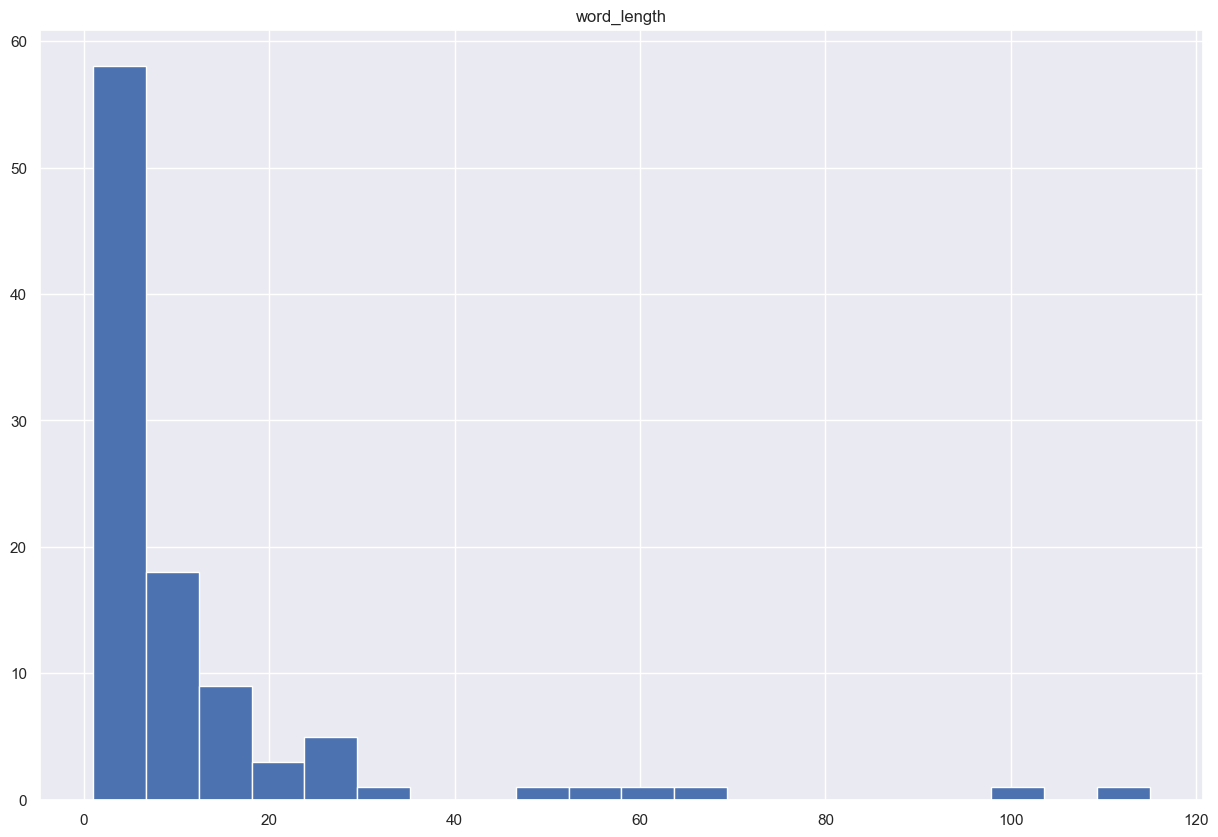

In [38]:
#Calculating text length
data_subsample[["word_length", "star_sentiment"]].hist(bins=20, figsize=(15, 10))

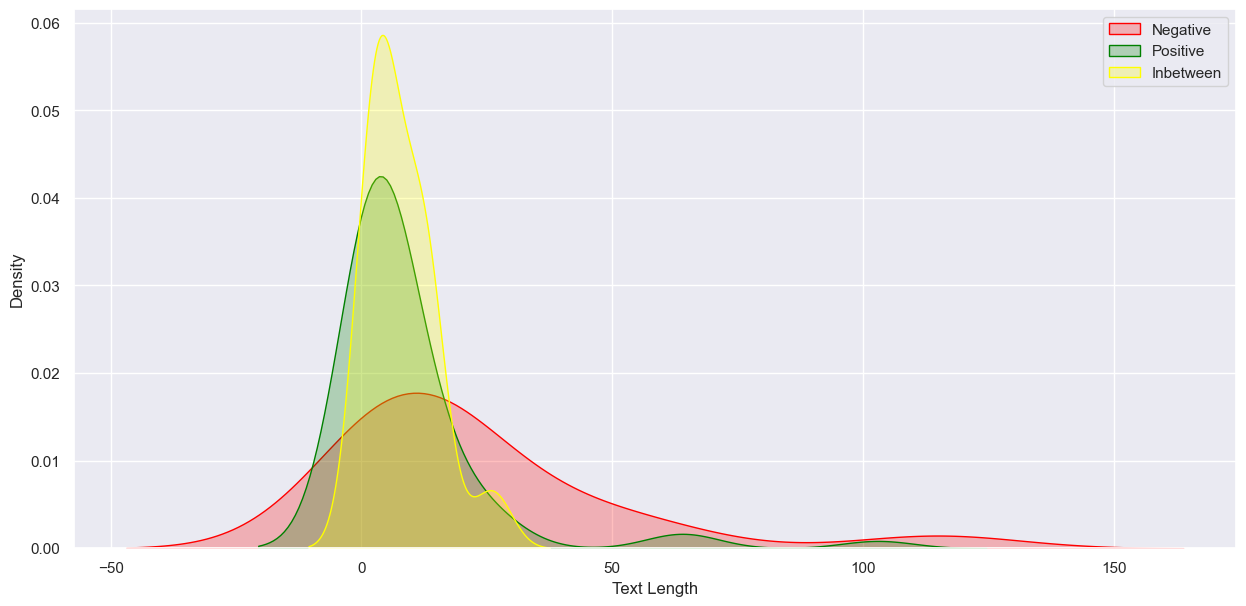

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['red', 'green','yellow']
labels = ['Negative', 'Positive', 'Inbetween']

for label,clr in zip(labels,cmap):
    sns.kdeplot(data_subsample.loc[(data_subsample['star_sentiment'] == label),'word_length'], color=clr, shade=True, label=label)
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.legend()

In [14]:
#removing punctuation and converting to lower case
import re
import string

def text_clean1(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text

cleaned1 = lambda x: text_clean1(x)


# using function on columns
data['cleaned_reviewheadline'] = data['review_headline'].apply(cleaned1)
data['cleaned_reviewbody'] = data['review_body'].apply(cleaned1)


#Another round of cleaning
def text_clean2(text):
    text = re.sub('\n','', text)
    return text

cleaned2 = lambda x: text_clean2(x)
data['cleaned_reviewheadline'] = data['cleaned_reviewheadline'].apply(cleaned2)
data['cleaned_reviewbody'] = data['cleaned_reviewbody'].apply(cleaned2)

data.head()


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used this for elite dangerous on my mac an ama...
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved it i didnt even realise it was a gaming...
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work and not as it is advertised
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice but tend to slip away from stick in inten...
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great for collecting quality mate...


In [15]:
#Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
data['cleaned_reviewbody'] = data['cleaned_reviewbody'].apply(lambda words: ' '.join(word.lower() for word in words.split()if word not in stopwords))
data.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R0088258\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used elite dangerous mac amazing joystick espe...
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved didnt even realise gaming mouse typed 34...
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work advertised
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice tend slip away stick intense hard pressed...
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great collecting quality material...


In [ ]:
#Tokenization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split(' ')])

data['tokenized_reviewbody'] = data['cleaned_reviewbody'].apply(lemmatize_text)
data.head()

In [16]:
#Text Exploratory Analysis
data['word_length'] = data['cleaned_reviewbody'].str.split().str.len()
data.head()
def sentiment(row):
    if row['star_rating'] == 5:
        return "Positive"
    elif row['star_rating'] == 1:
        return "Negative"
    elif  1 < row['star_rating'] < 5:
        return "Inbetween"
    else:
        return "Undefined"
    

data['star_sentiment'] = data.apply(sentiment,axis =1)
data.head()



,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,cleaned_reviewheadline,cleaned_reviewbody,word_length,star_sentiment
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. i especially love that yo...,"used this for elite dangerous on my mac, an am...",2015-08-31,an amazing joystick i especially love that you...,used elite dangerous mac amazing joystick espe...,17,Positive
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,definitely a silent mouse... not a single clic...,"loved it, i didn't even realise it was a gami...",2015-08-31,definitely a silent mouse not a single click w...,loved didnt even realise gaming mouse typed 34...,25,Positive
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,one star,poor quality work and not as it is advertised.,2015-08-31,one star,poor quality work advertised,4,Negative
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,good but could be bettee,nice tend slip away stick intense hard pressed...,10,Inbetween
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,great but flawed.,"great amiibo, great for collecting. quality ma...",2015-08-31,great but flawed,great amiibo great collecting quality material...,9,Inbetween


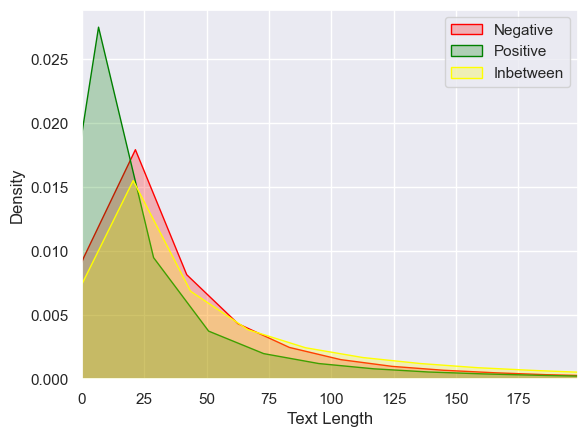

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
fig, ax = plt.subplots()
cmap = ['red', 'green','yellow']
labels = ['Negative', 'Positive', 'Inbetween']

for label,clr in zip(labels,cmap):
    sns.kdeplot(data.loc[(data['star_sentiment'] == label),'word_length'], ax=ax, color=clr, shade=True, label=label)
    ax.set_xlim(0,199)
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.legend()
   